Importing numpy, matplotlib.plt, pandas and representing them as variable np, plt, pd. 
Importing train_test_split from sklearn.model_selection package which is to split a collection into two parts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

This is done to understand which model will give a far better accuracy.
This is to compare between logistic regression and KNN algortithms.
They are implemented using sklearn

In [2]:
bnote=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt')
bnote.columns=['variance','skewness','curtosis','entropy','class']

This is to understand the data distribution when compared between two features.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


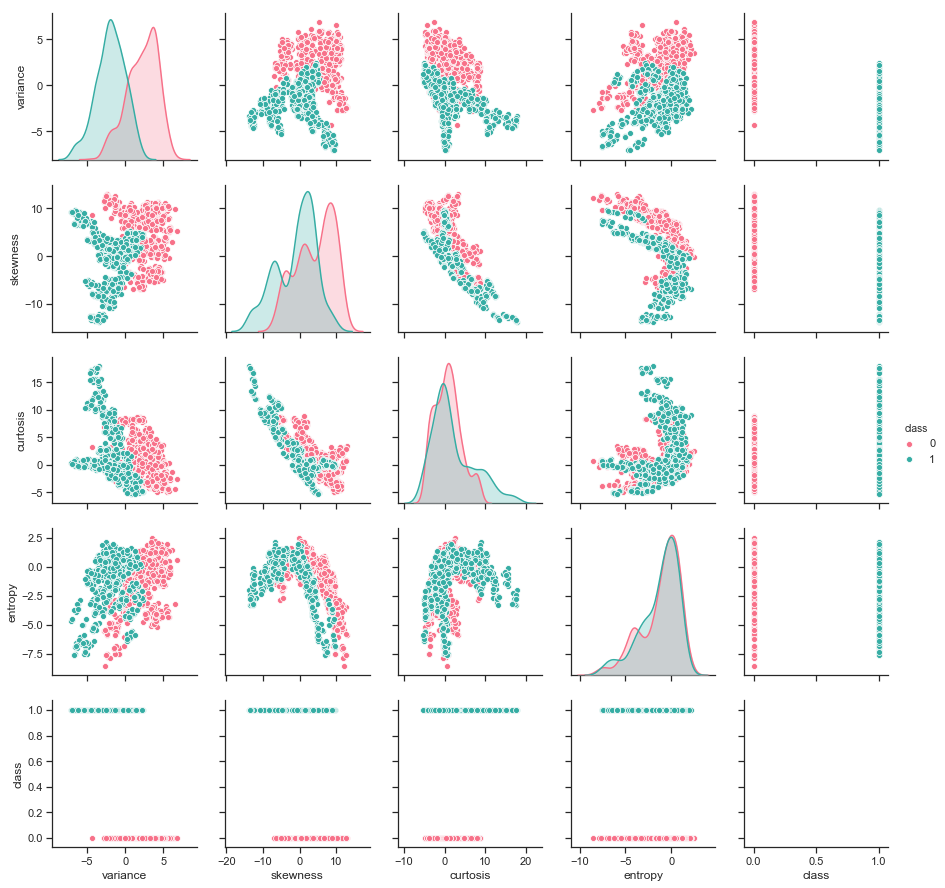

In [3]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
#b = sns.load_dataset(bnote)
g = sns.pairplot(bnote,hue="class",palette="husl")

Text(0.5, 0, 'entropy')

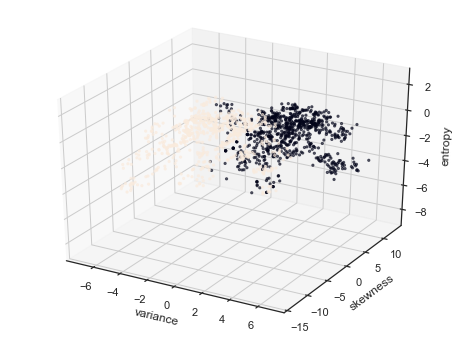

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bnote['variance'],bnote['skewness'],bnote['entropy'], s=5, alpha=0.6,c=bnote['class'])
ax.set_xlabel('variance')
ax.set_ylabel('skewness')
ax.set_zlabel('entropy')

Text(0.5, 0, 'variance')

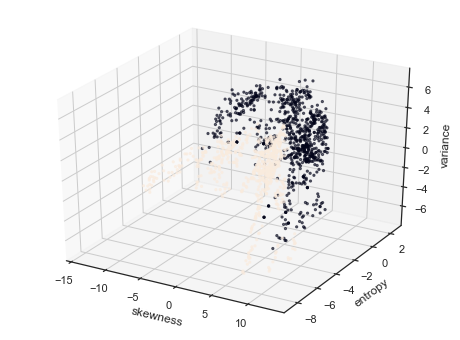

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bnote['skewness'],bnote['entropy'],bnote['variance'], s=5, alpha=0.6,c=bnote['class'])
ax.set_xlabel('skewness')
ax.set_ylabel('entropy')
ax.set_zlabel('variance')

Text(0.5, 0, 'curtosis')

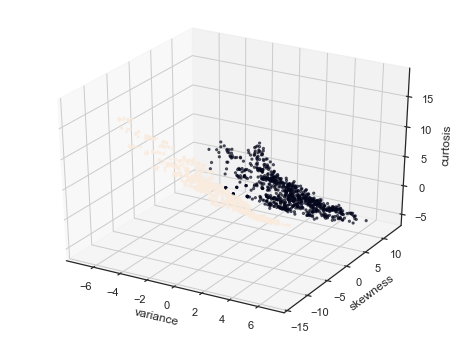

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bnote['variance'],bnote['skewness'],bnote['curtosis'], s=5, alpha=0.6,c=bnote['class'])
ax.set_xlabel('variance')
ax.set_ylabel('skewness')
ax.set_zlabel('curtosis')

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

AN ATTEMPT TO UNDERSTAND WHICH FEATURES TO SELECT FOR KNN

In [8]:
def algKNNorLOG():
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)
    scaler=MinMaxScaler()
    x_train=scaler.fit_transform(xtrain)
    x_test=scaler.fit_transform(xtest)
    
    classifier=KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2)
    classifier.fit(x_train,ytrain)
    y_pred=classifier.predict(x_test)
    print("KNN accuracy",accuracy_score(ytest,y_pred))
    print("KNN:",classification_report(ytest,y_pred))
    
    regressor=LogisticRegression()
    regressor.fit(x_train,ytrain)
    y_pred=regressor.predict(x_test)
    print("LOG accuracy",accuracy_score(ytest,y_pred))
    print("LOG:",classification_report(ytest,y_pred))

In [9]:
x1=np.array(bnote['curtosis'])
x2=np.array(bnote['variance'])
x3=np.array(bnote['skewness'])
x4=np.array(bnote['entropy'])
y=np.array(bnote['class'])

For all Features

In [10]:
x=np.column_stack((x1,x2,x3,x4))
algKNNorLOG()

KNN accuracy 0.9970845481049563
KNN:               precision    recall  f1-score   support

           0       1.00      0.99      1.00       185
           1       0.99      1.00      1.00       158

   micro avg       1.00      1.00      1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343

LOG accuracy 0.9504373177842566
LOG:               precision    recall  f1-score   support

           0       0.93      0.98      0.96       185
           1       0.98      0.91      0.94       158

   micro avg       0.95      0.95      0.95       343
   macro avg       0.95      0.95      0.95       343
weighted avg       0.95      0.95      0.95       343



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Now lets check for the features: curtosis,variance,skewness

In [11]:
x=np.column_stack((x1,x2,x3))
algKNNorLOG()

KNN accuracy 1.0
KNN:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       156

   micro avg       1.00      1.00      1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343

LOG accuracy 0.956268221574344
LOG:               precision    recall  f1-score   support

           0       0.94      0.98      0.96       187
           1       0.98      0.92      0.95       156

   micro avg       0.96      0.96      0.96       343
   macro avg       0.96      0.95      0.96       343
weighted avg       0.96      0.96      0.96       343



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Now lets check for the features: entropy,variance,skewness

In [12]:
x=np.column_stack((x4,x2,x3))
algKNNorLOG()

KNN accuracy 0.9650145772594753
KNN:               precision    recall  f1-score   support

           0       1.00      0.94      0.97       190
           1       0.93      1.00      0.96       153

   micro avg       0.97      0.97      0.97       343
   macro avg       0.96      0.97      0.96       343
weighted avg       0.97      0.97      0.97       343

LOG accuracy 0.8775510204081632
LOG:               precision    recall  f1-score   support

           0       0.91      0.86      0.89       190
           1       0.84      0.90      0.87       153

   micro avg       0.88      0.88      0.88       343
   macro avg       0.88      0.88      0.88       343
weighted avg       0.88      0.88      0.88       343



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Now lets check for the features: curtosis,variance,entropy

In [13]:
x=np.column_stack((x1,x2,x4))
algKNNorLOG()

KNN accuracy 0.9067055393586005
KNN:               precision    recall  f1-score   support

           0       0.87      0.97      0.92       182
           1       0.96      0.84      0.89       161

   micro avg       0.91      0.91      0.91       343
   macro avg       0.91      0.90      0.91       343
weighted avg       0.91      0.91      0.91       343

LOG accuracy 0.8717201166180758
LOG:               precision    recall  f1-score   support

           0       0.83      0.96      0.89       182
           1       0.94      0.78      0.85       161

   micro avg       0.87      0.87      0.87       343
   macro avg       0.88      0.87      0.87       343
weighted avg       0.88      0.87      0.87       343



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Now lets check for the features: curtosis,skewness,entropy

In [14]:
x=np.column_stack((x1,x3,x4))
algKNNorLOG()

KNN accuracy 0.9533527696793003
KNN:               precision    recall  f1-score   support

           0       0.94      0.98      0.96       191
           1       0.98      0.91      0.95       152

   micro avg       0.95      0.95      0.95       343
   macro avg       0.96      0.95      0.95       343
weighted avg       0.95      0.95      0.95       343

LOG accuracy 0.7784256559766763
LOG:               precision    recall  f1-score   support

           0       0.79      0.83      0.81       191
           1       0.77      0.72      0.74       152

   micro avg       0.78      0.78      0.78       343
   macro avg       0.78      0.77      0.77       343
weighted avg       0.78      0.78      0.78       343



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The model may have overfitted(Curse of Dimentionality:Increase in dimension also leads to the problem of overfitting)
The features are curtosis,variance,skewness,entropy

Hence let try for the features:curtosis and variance 1,2

In [15]:
x=np.column_stack((x1,x2))
algKNNorLOG()

KNN accuracy 0.9154518950437318
KNN:               precision    recall  f1-score   support

           0       0.94      0.91      0.93       199
           1       0.88      0.92      0.90       144

   micro avg       0.92      0.92      0.92       343
   macro avg       0.91      0.92      0.91       343
weighted avg       0.92      0.92      0.92       343

LOG accuracy 0.8717201166180758
LOG:               precision    recall  f1-score   support

           0       0.87      0.91      0.89       199
           1       0.87      0.81      0.84       144

   micro avg       0.87      0.87      0.87       343
   macro avg       0.87      0.86      0.87       343
weighted avg       0.87      0.87      0.87       343



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Hence let try for the features:curtosis and skewness 1,3

In [16]:
x=np.column_stack((x1,x3))
algKNNorLOG()

KNN accuracy 0.8950437317784257
KNN:               precision    recall  f1-score   support

           0       0.91      0.92      0.91       205
           1       0.88      0.86      0.87       138

   micro avg       0.90      0.90      0.90       343
   macro avg       0.89      0.89      0.89       343
weighted avg       0.89      0.90      0.89       343

LOG accuracy 0.8046647230320699
LOG:               precision    recall  f1-score   support

           0       0.87      0.80      0.83       205
           1       0.73      0.82      0.77       138

   micro avg       0.80      0.80      0.80       343
   macro avg       0.80      0.81      0.80       343
weighted avg       0.81      0.80      0.81       343



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Hence let try for the features:curtosis and entropy 1,4

In [17]:
x=np.column_stack((x1,x4))
algKNNorLOG()

KNN accuracy 0.6443148688046647
KNN:               precision    recall  f1-score   support

           0       0.65      0.78      0.71       190
           1       0.63      0.48      0.54       153

   micro avg       0.64      0.64      0.64       343
   macro avg       0.64      0.63      0.63       343
weighted avg       0.64      0.64      0.64       343

LOG accuracy 0.5393586005830904
LOG:               precision    recall  f1-score   support

           0       0.56      0.76      0.65       190
           1       0.47      0.26      0.34       153

   micro avg       0.54      0.54      0.54       343
   macro avg       0.52      0.51      0.49       343
weighted avg       0.52      0.54      0.51       343



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Hence let try for the features:variance and skewness 2,3

In [18]:
x=np.column_stack((x2,x3))
algKNNorLOG()

KNN accuracy 0.9387755102040817
KNN:               precision    recall  f1-score   support

           0       0.95      0.94      0.95       196
           1       0.92      0.94      0.93       147

   micro avg       0.94      0.94      0.94       343
   macro avg       0.94      0.94      0.94       343
weighted avg       0.94      0.94      0.94       343

LOG accuracy 0.880466472303207
LOG:               precision    recall  f1-score   support

           0       0.85      0.96      0.90       196
           1       0.94      0.77      0.85       147

   micro avg       0.88      0.88      0.88       343
   macro avg       0.89      0.87      0.87       343
weighted avg       0.89      0.88      0.88       343



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Hence let try for the features:variance and entropy 2,4

In [19]:
x=np.column_stack((x2,x4))
algKNNorLOG()

KNN accuracy 0.8950437317784257
KNN:               precision    recall  f1-score   support

           0       0.90      0.92      0.91       197
           1       0.89      0.86      0.87       146

   micro avg       0.90      0.90      0.90       343
   macro avg       0.89      0.89      0.89       343
weighted avg       0.89      0.90      0.89       343

LOG accuracy 0.8746355685131195
LOG:               precision    recall  f1-score   support

           0       0.87      0.92      0.89       197
           1       0.88      0.82      0.85       146

   micro avg       0.87      0.87      0.87       343
   macro avg       0.88      0.87      0.87       343
weighted avg       0.87      0.87      0.87       343



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Hence let try for the features:skewness and entropy 3,4

In [20]:
x=np.column_stack((x3,x4))
algKNNorLOG()

KNN accuracy 0.8629737609329446
KNN:               precision    recall  f1-score   support

           0       0.86      0.89      0.87       183
           1       0.86      0.84      0.85       160

   micro avg       0.86      0.86      0.86       343
   macro avg       0.86      0.86      0.86       343
weighted avg       0.86      0.86      0.86       343

LOG accuracy 0.6384839650145773
LOG:               precision    recall  f1-score   support

           0       0.62      0.83      0.71       183
           1       0.68      0.42      0.52       160

   micro avg       0.64      0.64      0.64       343
   macro avg       0.65      0.62      0.61       343
weighted avg       0.65      0.64      0.62       343



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


One feature at a time, Features are curtosis, skewness, variance, entropy.

In [21]:
x=np.array(bnote['entropy']).reshape(-1,1)
algKNNorLOG()

KNN accuracy 0.5043731778425656
KNN:               precision    recall  f1-score   support

           0       0.55      0.60      0.58       192
           1       0.43      0.38      0.40       151

   micro avg       0.50      0.50      0.50       343
   macro avg       0.49      0.49      0.49       343
weighted avg       0.50      0.50      0.50       343

LOG accuracy 0.5597667638483965
LOG:               precision    recall  f1-score   support

           0       0.56      1.00      0.72       192
           1       0.00      0.00      0.00       151

   micro avg       0.56      0.56      0.56       343
   macro avg       0.28      0.50      0.36       343
weighted avg       0.31      0.56      0.40       343



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
x=np.array(bnote['variance']).reshape(-1,1)
algKNNorLOG()

KNN accuracy 0.8221574344023324
KNN:               precision    recall  f1-score   support

           0       0.83      0.85      0.84       186
           1       0.82      0.79      0.80       157

   micro avg       0.82      0.82      0.82       343
   macro avg       0.82      0.82      0.82       343
weighted avg       0.82      0.82      0.82       343

LOG accuracy 0.8279883381924198
LOG:               precision    recall  f1-score   support

           0       0.81      0.89      0.85       186
           1       0.86      0.75      0.80       157

   micro avg       0.83      0.83      0.83       343
   macro avg       0.83      0.82      0.82       343
weighted avg       0.83      0.83      0.83       343



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
x=np.array(bnote['curtosis']).reshape(-1,1)
algKNNorLOG()

KNN accuracy 0.6588921282798834
KNN:               precision    recall  f1-score   support

           0       0.67      0.77      0.72       193
           1       0.63      0.52      0.57       150

   micro avg       0.66      0.66      0.66       343
   macro avg       0.65      0.64      0.64       343
weighted avg       0.66      0.66      0.65       343

LOG accuracy 0.6151603498542274
LOG:               precision    recall  f1-score   support

           0       0.62      0.82      0.71       193
           1       0.60      0.35      0.44       150

   micro avg       0.62      0.62      0.62       343
   macro avg       0.61      0.59      0.57       343
weighted avg       0.61      0.62      0.59       343



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
x=np.array(bnote['skewness']).reshape(-1,1)
algKNNorLOG()

KNN accuracy 0.6880466472303207
KNN:               precision    recall  f1-score   support

           0       0.71      0.72      0.71       186
           1       0.66      0.66      0.66       157

   micro avg       0.69      0.69      0.69       343
   macro avg       0.69      0.69      0.69       343
weighted avg       0.69      0.69      0.69       343

LOG accuracy 0.5860058309037901
LOG:               precision    recall  f1-score   support

           0       0.60      0.69      0.64       186
           1       0.56      0.46      0.51       157

   micro avg       0.59      0.59      0.59       343
   macro avg       0.58      0.58      0.58       343
weighted avg       0.58      0.59      0.58       343



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
